<a href="https://colab.research.google.com/github/aleksandr-del/yandex-praticum-projects/blob/main/yandex_practicum_calculus_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом разрабатывает приложение, чтобы привлечь новых клиентов. В нём можно будет узнать рыночную стоимость своего автомобиля.

Цель настоящего проета - модель, которая умеет определять стоимость автомобиля. 

Заказчику важны качество предсказания, время обучения модели и время предсказания модели.

Для оценки качества моделей будем применять метрику RMSE. Заказчика удовлетворит значение метрики RMSE меньше 2500.

Нам предоставлены следующие данные об автомобилях:

`DateCrawled` — дата скачивания анкеты из базы;

`VehicleType` — тип автомобильного кузова;

`RegistrationYear` — год регистрации автомобиля;

`Gearbox` — тип коробки передач;

`Power` — мощность (л. с.);

`Model` — модель автомобиля;

`Kilometer` — пробег (км);

`RegistrationMonth` — месяц регистрации автомобиля;

`FuelType` — тип топлива;

`Brand` — марка автомобиля;

`Repaired` — была машина в ремонте или нет;

`DateCreated` — дата создания анкеты;

`NumberOfPictures` — количество фотографий автомобиля;

`PostalCode` — почтовый индекс владельца анкеты (пользователя);

`LastSeen` — дата последней активности пользователя;

`Price` — цена (евро)


План работы над проектом:

1. подготовить и изучить данные;
2. обучить разные модели;
3. выбрать модель, лучшим образом соответствующую критериям заказчика.

## Подготовка и изучение данных

Импортируем необходимы для работы библиотеки

In [ ]:
# Библиотеки Pandas, Numpy, Matplotlib, Seaborn, модули и функции из библиотеки Sci-kit learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.ensemble import RandomForestRegressor

Устанавливаем и импортируем LightGBM:

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm
from lightgbm import LGBMRegressor

Загружаем и выводим на экран данные:

In [ ]:
# Данные присваиваем переменной df
df = pd.read_csv('/datasets/autos.csv')
# Выводим первые 5 строк таблицы
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


Общая информация о таблице:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

**Вывод**: в данных 354 369 наблюдений, 15 признаков и один целевой признак.

Доли пропущенных значений в признаках:

In [ ]:
df.isna().mean()

DateCrawled          0.000000
Price                0.000000
VehicleType          0.105794
RegistrationYear     0.000000
Gearbox              0.055967
Power                0.000000
Model                0.055606
Kilometer            0.000000
RegistrationMonth    0.000000
FuelType             0.092827
Brand                0.000000
Repaired             0.200791
DateCreated          0.000000
NumberOfPictures     0.000000
PostalCode           0.000000
LastSeen             0.000000
dtype: float64

**Вывод**. Значения пропущены в признаках:

- Repaired - 20% пропусков, 
- FuelType - 9,3% пропусков, 
- Model - 5,5% пропусков, 
- Gearbox - 5,6% пропусков, 
- VehicleType - 10,6% пропусков.

### Заполнение пропусков

#### Признак Repaired

Уникальные значения признака:

In [ ]:
df['Repaired'].unique()

array([nan, 'yes', 'no'], dtype=object)

Распределение значений признака:

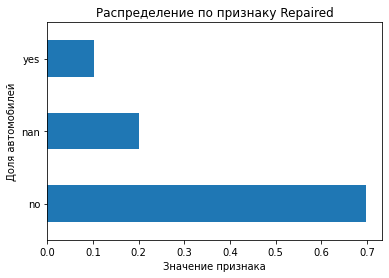

In [ ]:
df['Repaired'].value_counts(dropna=False, normalize=True).plot.barh()
plt.xlabel('Значение признака')
plt.ylabel('Доля автомобилей')
plt.title('Распределение по признаку Repaired')

plt.show()

**Вывод**: признак Repaired является категориальным, на пропуски приходится порядка 20%; доля автомобилей, бывших в ремонте, около 10%; нам достоверно не известны причины пропусков.

Предлагаем пропуски заполнить новым значением признака: 'no info'

In [ ]:
# Заполняем пропуски значением 'no info'
df['Repaired'] = df['Repaired'].fillna('no info')
# Проверяем наличие пропусков
df['Repaired'].isna().sum()

0

#### Признак FuelType

Уникальные значения признака:

In [ ]:
df['FuelType'].unique()

array(['petrol', 'gasoline', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electric'], dtype=object)

Распределение значений признака:

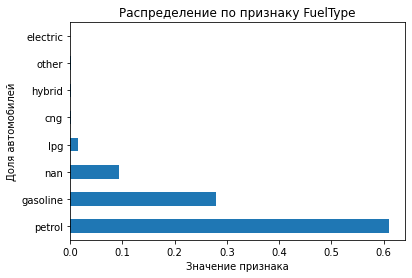

In [ ]:
df['FuelType'].value_counts(dropna=False, normalize=True).plot.barh()
plt.xlabel('Значение признака')
plt.ylabel('Доля автомобилей')
plt.title('Распределение по признаку FuelType')
plt.show()

**Вывод**: признак  FuelType является категориальным; на пропуски приходится порядка 10%; соотношение автомобилей на бензине к автомобилям на дизельном топливе 2 к 1; доля автомобилей на альтернативном топливе не превышает 2%; нам достоверно не известны причины пропусков.

Предлагаем пропуски заполнить новым значением признака: 'no info'

In [ ]:
# Заполняем пропуски значением 'no info'
df['FuelType'] = df['FuelType'].fillna('no info')
# Проверяем наличие пропусков
df['FuelType'].isna().sum()

0

#### Признак Model

Уникальные значения признака:

In [ ]:
df['Model'].unique()

array(['golf', nan, 'grand', 'fabia', '3er', '2_reihe', 'other', 'c_max',
       '3_reihe', 'passat', 'navara', 'ka', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'meriva', 'arosa', 'c4', 'civic', 'transporter',
       'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'corsa', 'one',
       'fortwo', '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta',
       'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort',
       'forester', 'xc_reihe', 'scenic', 'a4', 'a1', 'insignia', 'combo',
       'focus', 'tt', 'a6', 'jazz', 'omega', 'slk', '7er', '80', '147',
       '100', 'z_reihe', 'sportage', 'sorento', 'v40', 'ibiza', 'mustang',
       'eos', 'touran', 'getz', 'a3', 'almera', 'megane', 'lupo', 'r19',
       'zafira', 'caddy', 'mondeo', 'cordoba', 'colt', 'impreza',
       'vectra', 'berlingo', 'tiguan', 'i_reihe', 'espace', 'sharan',
       '6_reihe', 'panda', 'up', 'seicento', 'ceed', '5_reihe', 'yeti',
       'octavia', 'mii', 'rx_reihe', '6er', 'modus', 'fox'

**Вывод**: признак  Model является категориальным, всего в данных 251 уникальная модель.

Предлагаем пропуски заполнить новым значением признака: 'no info'

In [ ]:
# Заполняем пропуски значением 'no info'
df['Model'] = df['Model'].fillna('no info')
# Проверяем наличие пропусков
df['Model'].isna().sum()

0

Наименования моделей, количество наблюдений которых меньше или равно 5:

In [ ]:
df['Model'].value_counts()[df['Model'].value_counts() <= 5].index.tolist()

['rangerover', 'serie_3', 'range_rover_evoque', 'serie_1']

**Вывод**: для моделей, количество наблюдений которых меньше или равно 5, существует риск оказаться только в обучающей или в тестовой выборках, но не быть предостленными в обоих.

Предлагаем таким моделям установить значение признака 'other'.

---



In [ ]:
# Заменяем названия моделей на 'other'
df['Model'] = df['Model'].replace(['serie_3', 'rangerover', 'range_rover_evoque', 'serie_1'],
                    'other')

#### Признак Gearbox

Уникальные значения признака:

In [ ]:
df['Gearbox'].unique()

array(['manual', 'auto', nan], dtype=object)

Распределение значений признака:

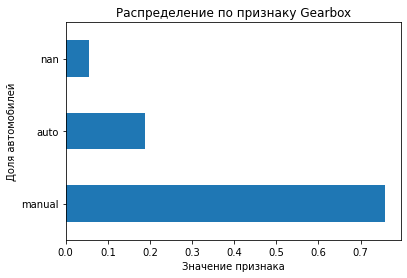

In [ ]:
df['Gearbox'].value_counts(dropna=False, normalize=True).plot.barh()
plt.xlabel('Значение признака')
plt.ylabel('Доля автомобилей')
plt.title('Распределение по признаку Gearbox')
plt.show()

**Вывод**: признак Gearbox является категориальным; на пропуски приходится порядка 5,6%; доля автомобилей с ручной коробкой передач составлят около 75%; на автомобили с автоматической коробкой передач приходится примерно 20%.

Предлагаем пропуски заполнить новым значением признака: 'no info'

In [ ]:
# Заполняем пропуски значением 'no info'
df['Gearbox'] = df['Gearbox'].fillna('no info')
# Проверяем наличие пропусков
df['Gearbox'].isna().sum()

0

#### Признак VehicleType

Уникальные значения признака:

In [ ]:
df['VehicleType'].unique()

array([nan, 'coupe', 'suv', 'small', 'sedan', 'convertible', 'bus',
       'wagon', 'other'], dtype=object)

Распределение значений признака:

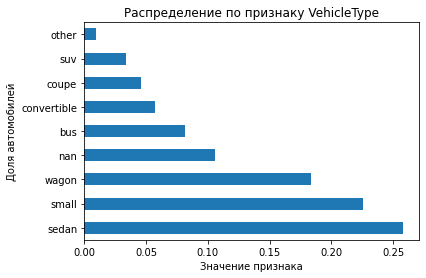

In [ ]:
df['VehicleType'].value_counts(dropna=False, normalize=True).plot.barh()
plt.xlabel('Значение признака')
plt.ylabel('Доля автомобилей')
plt.title('Распределение по признаку VehicleType')
plt.show()

**Вывод**: признак VehicleType является категориальным; на пропуски приходится порядка 10,6%; наиболее популярны автомобили с кузовом седан, хэтчбек и универсал - их совокупная доля состовляет около 66%.

Предлагаем пропуски заполнить новым значением признака: 'no info'

In [ ]:
# Заполняем пропуски значением 'no info'
df['VehicleType'] = df['VehicleType'].fillna('no info')
# Проверяем наличие пропусков
df['VehicleType'].isna().sum()

0

In [ ]:
print(f'Всего пропусков в данных: {df.isna().sum().sum()}.')

Всего пропусков в данных: 0.


### Аномалии в количественных признаках

Список количественных признаков:

In [ ]:
df.select_dtypes(include=['int64']).columns

Index(['Price', 'RegistrationYear', 'Power', 'Kilometer', 'RegistrationMonth',
       'NumberOfPictures', 'PostalCode'],
      dtype='object')

Описательная статистика количественных признаков:

In [ ]:
df[['Price', 'RegistrationYear', 'Power', 'Kilometer', 
    'RegistrationMonth', 'NumberOfPictures']].describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0


**Вывод.** Наблюдаются следующие аномалии в количественных признаках:

- у NumberOfPictures всего одного константное значение, равное 0;
- у RegistrationMonth значения должны быть от 1 до 12, но в наблюдениях встречаются значения 0;
- у Kilometer более 50% всех наблюдений равны константным 150 000;
- у Power наблюдаются нулевые и аномально высокие значения;
- у RegistrationYear наблюдаются аномально маленькие и аномально большие значения;
- у Price наблюдаются нулевые значения. 


#### Признак NumberOfPictures

У признака NumberOfPictures	всего одно константное значение, равное 0.

Предлагаем из данных удалить столбец с признаком NumberOfPictures.	

In [ ]:
df = df.drop('NumberOfPictures', axis=1)

#### Признак RegistrationYear

Уникальные значения признака RegistrationYear:	

In [ ]:
df['RegistrationYear'].sort_values().unique()

array([1000, 1001, 1039, 1111, 1200, 1234, 1253, 1255, 1300, 1400, 1500,
       1600, 1602, 1688, 1800, 1910, 1915, 1919, 1920, 1923, 1925, 1927,
       1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2066, 2200, 2222, 2290, 2500, 2800, 2900, 3000,
       3200, 3500, 3700, 3800, 4000, 4100, 4500, 4800, 5000, 5300, 5555,
       5600, 5900, 5911, 6000, 6500, 7000, 7100, 7500, 7800, 8000, 8200,
       8455, 8500, 8888, 9000, 9229, 9450, 9996, 99

Количество анкет, созданных после 2016 года:

In [ ]:
df['DateCreated'].str.startswith(('2017', '2018', '2019')).sum()

0

**Вывод**: автомобилестроение, как отрасль машиностроения зародилась в 1880-х — 1890-х годах во Франции и Германии, а в конце XIX — начале XX веков в Англии, Австро-Венгрии, Италии, США, Бельгии, Канаде, Швейцарии, Швеции и Российской Империи.

Все анкеты были созданы до 2016 года включительно, а значит, год регистрации автомобиля не может быть позже 2016 года.

Таким образом, предлагаем удалить наблюдения с годом регистрации автомобиля менее 1910 и более 2016.

In [ ]:
df = df[(df['RegistrationYear'] > 1910) & (df['RegistrationYear'] <= 2016)]

#### Признак Power

20 наиболеее частов встрачающихся значений признака Power:

In [ ]:
df['Power'].value_counts().head(20)

0      36362
75     22806
60     15167
150    14150
101    12732
140    12473
90     12196
116    11566
105     9957
170     9872
125     6677
136     6582
102     6200
163     5971
54      5546
143     5197
122     5016
131     4985
109     4631
110     4550
Name: Power, dtype: int64

Мощность двигателя автомобиля, равная 0, — наиболее часто встречающийся признак (40 007 наблюдений).

Количество наблюдений, для которых мощность двигателя находится за границей 3 стандартных отклонения от среднего значения:

In [ ]:
len(df[df['Power']  > (df['Power'].mean() + df['Power'].std() * 3)])

326

**Вывод**: предлагаем редкие аномальные значения удалить из данных, а нулевые значения заменить средним для данной марки автомобиля.

In [ ]:
# Удаляем аномально большие значения
df = df[df['Power']  < (df['Power'].mean() + df['Power'].std() * 3)]

In [ ]:
# Создаем таблицу средних значений для каждой марки автомоблия
# Средние значения считаются без учета нулевых
t = df[df['Power'] != 0].groupby('Brand')['Power'].mean()

In [ ]:
# Проходим по списку марок автомобиля, для которых мощность двигателя равна 0
for x in df[df['Power'] == 0]['Brand'].unique():
    # Каждое нулевое значение заменяем средним для данной марки
    df.loc[(df['Power'] == 0) & (df['Brand'] == x), 'Power'] = t[x]

In [ ]:
# Проверяем количество автомобилей с мощностью двигателя, равной 0
len(df[df['Power'] == 0])

0

#### Признак Kilometer

Распределение автомобилей по пробегу:

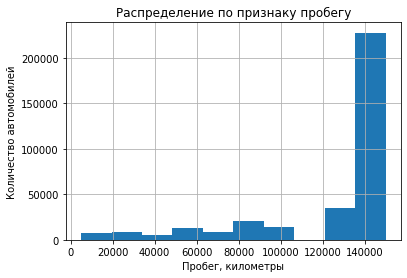

In [ ]:
df['Kilometer'].hist(bins=10)
plt.xlabel('Пробег, километры')
plt.ylabel('Количество автомобилей')
plt.title('Распределение по признаку пробегу')
plt.show()

Доля автомобилей с пробегом, равным 150 000 километров:

In [ ]:
len(df[df['Kilometer'] == 150000]) / len(df)

0.6700241051905724

Уникальные значения признака Kilometer:

In [ ]:
df['Kilometer'].sort_values().unique()

array([  5000,  10000,  20000,  30000,  40000,  50000,  60000,  70000,
        80000,  90000, 100000, 125000, 150000])

Зависимость средней цены автомобиля от пробега:

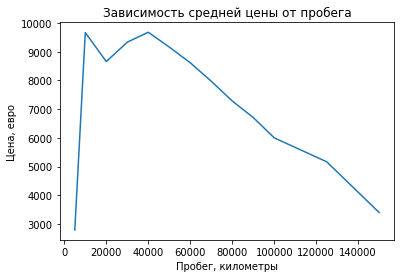

In [ ]:
df.groupby('Kilometer')['Price'].mean().plot()
plt.xlabel('Пробег, километры')
plt.ylabel('Цена, евро')
plt.title('Зависимость средней цены от пробега')
plt.show()

**Вывод**: признак Kilometer принимает только дискретные значения и фактически является категориальным; на автомобили с пробегом 150 000 километров приходится 2/3 всей выборки. Наблюдается отрицательная корреляция между средней ценой и пробегом автомобиля.


#### Признак RegistrationMonth

Распределение автомобилей по месяцу регистрации:

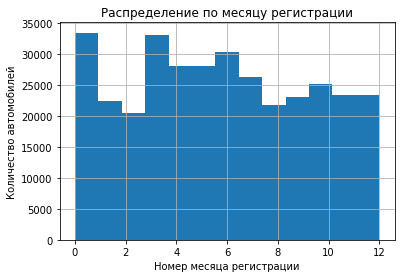

In [ ]:
df['RegistrationMonth'].hist(bins=13)
plt.xlabel('Номер месяца регистрации')
plt.ylabel('Количество автомобилей')
plt.title('Распределение по месяцу регистрации')
plt.show()

За исключение нулевого месяца распределение автомобилей примерно равномерное с пиком в марте. 

Корреляция между месяцем регистрации и ценой автомобиля за исключением автомобилей, месяц регистрации которых равен 0:

In [ ]:
df[df['RegistrationMonth'] != 0]['RegistrationMonth'].corr(df['Price'])

0.011835458190787886

**Вывод**: связь между месяцом регистрации автомобиля и его ценой не наблюдается.

Предлагаем удалить столбец с этим признаком.

In [ ]:
df = df.drop('RegistrationMonth', axis=1)

#### Признак Price

Распределение автомобилей по цене:

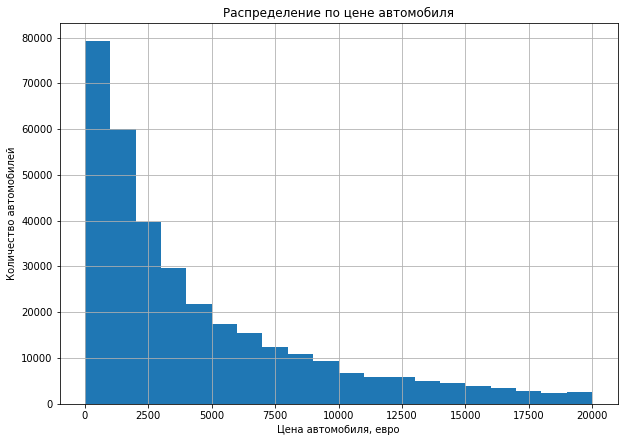

In [ ]:
df['Price'].hist(bins=20, figsize=(10, 7))
plt.xlabel('Цена автомобиля, евро')
plt.ylabel('Количество автомобилей')
plt.title('Распределение по цене автомобиля')
plt.show()

Распределение автомобилей по цене стоимостью до 1000 евро:

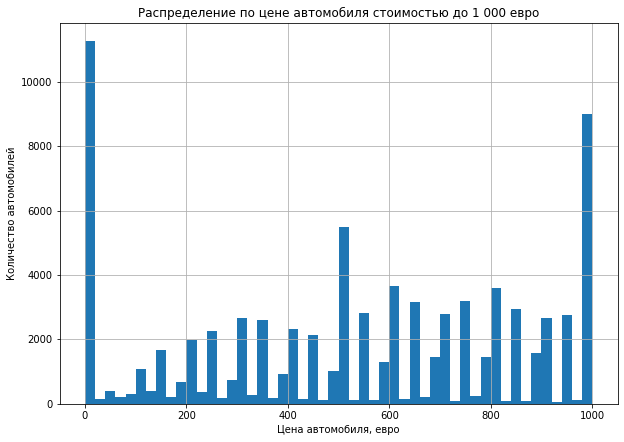

In [ ]:
df[df['Price']<= 1000]['Price'].hist(bins=50, figsize=(10, 7))
plt.xlabel('Цена автомобиля, евро')
plt.ylabel('Количество автомобилей')
plt.title('Распределение по цене автомобиля стоимостью до 1 000 евро')
plt.show()

Граница 2,5-го процентиля:

In [ ]:
df['Price'].quantile(0.025)

0.0

**Вывод**: наблюдаются аномально низкие значения с ценою до 10 евро (около 11 000 наблюдений).

Предлагаем наблюдения с аномально низкими значения удалить из данных.

In [ ]:
# Удаляем аномально низкие значения
df = df[df['Price']  > 1]

Проверяем данные на наличие дубликатов:

In [ ]:
df.duplicated().sum()

4

**Вывод**: в данных обнаружены 4 дубликата.

Предлагаем удалить дублирующиеся наблюдения.

In [ ]:
df = df.drop_duplicates()
# После удаления проверяем наличие дубликатов
df.duplicated().sum()

0


## Выборки для обучения моделей

### Признаки

Критерии оценки автомобилей установлены для получения объективных и максимально точных результатов оценки.

Существуют такие параметры, которые обязательно учитываются при оценивании любого автотранспортного средства. 

Все критерии оценки автомобилей можно условно разделить на несколько групп:

- основные параметры;
- техническое состояние;
- комплектация;
- дополнительные опции и прочее.

Основные параметры автомобиля:

1. Марка и модель: признаки `Model` и `Brand`, отчасти `VehicleType`.

2. Год выпуска: признак `RegistrationYear`.

3. Пробег автомобиля: признак `Kilometer`.

4. Тип коробки передач: признак `Gearbox`.

5. Привод автомобиля: данный признак в данных отсуствует.

7. Мощность и тип двигателя: признаки  `Power` и `FuelType`.

Техническое состояние: из доступных нам сведений о техническом состоянии автомобиля есть признак  `Repaired`.

Сведения о комплектации и иных дополнительных опциях автомобиля в данных отстуствуют.


Списки признаков:

In [ ]:
# В переменной X сохраняем список наименований признаков
X = ['RegistrationYear', 'Power', 'Gearbox', 'Model',
     'Kilometer', 'Brand', 'Repaired', 'VehicleType', 'FuelType']
# В переменной y сохраняем наименование целевого признака
y = 'Price'

### Обучающая и тестовая выборки

In [ ]:
# Делим данные на обучающую и тестовую выборку в соотношении 3 к 1
train, test = train_test_split(df, test_size=0.25, random_state=42)

## Обучение моделей

### Ridge регрессия ($l_2$ регуляризация)

Создаем сетку гиперпараметров, которые будем перебирать при обучении:

In [ ]:
model_grid_search = GridSearchCV(Ridge(random_state=42), 
                               [{'fit_intercept': [False, True],
                                 'normalize': [True, False],
                                 'alpha': [1, 1.1, 1.3, 1.4, 1.5]}],
                               cv=5, 
                               scoring=make_scorer(mean_squared_error, 
                                                   greater_is_better=False),
                                 verbose=10)

Обучаем модель:

In [ ]:
%%time
# При обучении категориальные признаки преобразуются методом OHE
model_grid_search.fit(pd.get_dummies(train[X], 
                                     columns=['Gearbox', 'Model', 
                                              'Kilometer', 'Brand', 
                                              'Repaired', 'VehicleType', 'FuelType'],
                                     drop_first=True), 
                      train[y])


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START alpha=1, fit_intercept=False, normalize=True...............
[CV 1/5; 1/20] END alpha=1, fit_intercept=False, normalize=True; total time=   2.4s
[CV 2/5; 1/20] START alpha=1, fit_intercept=False, normalize=True...............
[CV 2/5; 1/20] END alpha=1, fit_intercept=False, normalize=True; total time=   2.1s
[CV 3/5; 1/20] START alpha=1, fit_intercept=False, normalize=True...............
[CV 3/5; 1/20] END alpha=1, fit_intercept=False, normalize=True; total time=   2.2s
[CV 4/5; 1/20] START alpha=1, fit_intercept=False, normalize=True...............
[CV 4/5; 1/20] END alpha=1, fit_intercept=False, normalize=True; total time=   2.1s
[CV 5/5; 1/20] START alpha=1, fit_intercept=False, normalize=True...............
[CV 5/5; 1/20] END alpha=1, fit_intercept=False, normalize=True; total time=   2.1s
[CV 1/5; 2/20] START alpha=1, fit_intercept=False, normalize=False..............
[CV 1/5; 2/20] END alpha=1, fit_

GridSearchCV(cv=5, estimator=Ridge(random_state=42),
             param_grid=[{'alpha': [1, 1.1, 1.3, 1.4, 1.5],
                          'fit_intercept': [False, True],
                          'normalize': [True, False]}],
             scoring=make_scorer(mean_squared_error, greater_is_better=False),
             verbose=10)

Лучшие гиперпараметры модели:

In [ ]:
print(model_grid_search.best_params_)

{'alpha': 1.5, 'fit_intercept': True, 'normalize': False}


Предсказание модели на обучащей выборке:

In [ ]:
%%time
# При предсказании категориальные признаки преобразуются методом OHE
model_grid_search.predict(pd.get_dummies(train[X], 
                                                  columns=['Gearbox', 'Model', 
                                                           'Kilometer', 'Brand', 
                                                           'Repaired', 'VehicleType', 'FuelType'], 
                                                  drop_first=True))                                                          

CPU times: user 694 ms, sys: 372 ms, total: 1.07 s
Wall time: 1.01 s


array([ 9180.20350555, 10837.5543566 ,  3572.68048861, ...,
        7170.61911319,  3230.2889923 ,   622.87216663])

Качество модели на обучающей выборке:

In [ ]:
print(f'Лучшее RMSE на обучающей выборке: {round((-model_grid_search.best_score_) ** 0.5)}.')                                                          

Лучшее RMSE на обучающей выборке: 2597.


**Вывод**: фактическое время обучения модели Ridge регресии составило 4 минуты 8 секунд, фактическое время предсказания - 1,01 секунды. Лучшее RMSE модели на обучающей выборке составляет 2 597.

### LGBMRegressor

Меняем тип данных категориальных признаков с  object на category:

In [ ]:
lgbm_train_X = train[X].copy()

lgbm_train_X[['Gearbox', 'Model', 
             'Kilometer', 'Brand', 
             'Repaired', 'VehicleType', 
             'FuelType']] = lgbm_train_X[['Gearbox', 'Model', 
                                        'Kilometer', 'Brand', 
                                        'Repaired', 'VehicleType', 
                                        'FuelType']].astype('category')

Создаем сетку гиперпараметров, которые будем перебирать при обучении:

In [ ]:
model_lgbm_grid_search = GridSearchCV(LGBMRegressor(random_state=42),
                                      [{'n_estimators': [100, 150],
                                        'learning_rate': [0.01, 0.1]}],
                                      cv=5, 
                                      scoring=make_scorer(mean_squared_error, 
                                                          greater_is_better=False), 
                                      verbose=10)

Обучаем модель:

In [ ]:
%%time

model_lgbm_grid_search.fit(lgbm_train_X, train[y])

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START learning_rate=0.01, n_estimators=100........................
[CV 1/5; 1/4] END ......learning_rate=0.01, n_estimators=100; total time= 1.2min
[CV 2/5; 1/4] START learning_rate=0.01, n_estimators=100........................
[CV 2/5; 1/4] END ......learning_rate=0.01, n_estimators=100; total time= 1.1min
[CV 3/5; 1/4] START learning_rate=0.01, n_estimators=100........................
[CV 3/5; 1/4] END ......learning_rate=0.01, n_estimators=100; total time= 1.1min
[CV 4/5; 1/4] START learning_rate=0.01, n_estimators=100........................
[CV 4/5; 1/4] END ......learning_rate=0.01, n_estimators=100; total time= 1.4min
[CV 5/5; 1/4] START learning_rate=0.01, n_estimators=100........................
[CV 5/5; 1/4] END ......learning_rate=0.01, n_estimators=100; total time=  51.3s
[CV 1/5; 2/4] START learning_rate=0.01, n_estimators=150........................
[CV 1/5; 2/4] END ......learning_rate=0.01, n_est

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=42),
             param_grid=[{'learning_rate': [0.01, 0.1],
                          'n_estimators': [100, 150]}],
             scoring=make_scorer(mean_squared_error, greater_is_better=False),
             verbose=10)

Лучшие гиперпараметры модели:

In [ ]:
print(model_lgbm_grid_search.best_params_)

{'learning_rate': 0.1, 'n_estimators': 150}


Предсказание модели на обучающей выборке:

In [ ]:
%%time

model_lgbm_grid_search.predict(lgbm_train_X)                                                          

CPU times: user 3.41 s, sys: 0 ns, total: 3.41 s
Wall time: 3.41 s


array([ 8532.52486147, 16632.0231718 ,  2304.07550716, ...,
        3483.59318308,   752.52743933,   994.33375236])

Проверка качества модели на обучающей выборке:

In [ ]:
print(f'Лучшая RMSE на обучающей выборке: {round((-model_lgbm_grid_search.best_score_) ** 0.5)}.')                                                          

Лучшая RMSE на обучающей выборке: 1627.


**Вывод**: фактическое время обучения модели LGBM Regressor регресии составило 19 минут 14 секунд, фактическое время предсказания - 3,41 секунды. Лучшая RMSE модели составляет 1 627.

###  Random Forest

Создаем сетку гиперпараметров, которые будем перебирать при обучении:

In [ ]:
rfr_model_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), 
                                     [{'n_estimators': [100, 150], 
                                       'max_depth': [7, 9]}], 
                                     cv=5, 
                                     scoring=make_scorer(mean_squared_error, 
                                                         greater_is_better=False),
                                     verbose=10)

Обучаем модель:

In [ ]:
%%time
# При обучении категориальные признаки преобразуются методом OHE
rfr_model_grid_search.fit(pd.get_dummies(train[X], 
                                         columns=['Gearbox', 'Model', 
                                                  'Kilometer', 'Brand', 
                                                  'Repaired', 'VehicleType', 'FuelType'],
                                         drop_first=True), 
                          train[y])


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_depth=7, n_estimators=100...............................
[CV 1/5; 1/4] END .............max_depth=7, n_estimators=100; total time= 3.1min
[CV 2/5; 1/4] START max_depth=7, n_estimators=100...............................
[CV 2/5; 1/4] END .............max_depth=7, n_estimators=100; total time= 3.1min
[CV 3/5; 1/4] START max_depth=7, n_estimators=100...............................
[CV 3/5; 1/4] END .............max_depth=7, n_estimators=100; total time= 3.1min
[CV 4/5; 1/4] START max_depth=7, n_estimators=100...............................
[CV 4/5; 1/4] END .............max_depth=7, n_estimators=100; total time= 3.1min
[CV 5/5; 1/4] START max_depth=7, n_estimators=100...............................
[CV 5/5; 1/4] END .............max_depth=7, n_estimators=100; total time= 3.1min
[CV 1/5; 2/4] START max_depth=7, n_estimators=150...............................
[CV 1/5; 2/4] END .............max_depth=7, n_est

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_depth': [7, 9], 'n_estimators': [100, 150]}],
             scoring=make_scorer(mean_squared_error, greater_is_better=False),
             verbose=10)

Лучшие гиперпараметры модели:

In [ ]:
print(rfr_model_grid_search.best_params_)

{'max_depth': 9, 'n_estimators': 150}


Предсказание модели на обучающей выборке:

In [ ]:
%%time
# При предсказании категориальные признаки преобразуются методом OHE
rfr_model_grid_search.predict(pd.get_dummies(train[X], 
                                             columns=['Gearbox', 'Model', 
                                                      'Kilometer', 'Brand', 
                                                      'Repaired', 'VehicleType', 'FuelType'], 
                                             drop_first=True))  

CPU times: user 4.08 s, sys: 344 ms, total: 4.43 s
Wall time: 4.47 s


array([ 5933.47902361, 13737.9767441 ,  1696.34771535, ...,
        2045.99511004,   988.4636548 ,  1005.61683106])

Проверка качества модели на обучающей выборке:

In [ ]:
%%time
print(f'Лучшая RMSE на тестовой выборке: {round((-rfr_model_grid_search.best_score_) ** 0.5)}.')                                                          

Лучшая RMSE на тестовой выборке: 1993.
CPU times: user 155 µs, sys: 0 ns, total: 155 µs
Wall time: 138 µs


**Вывод**: фактическое время обучения модели Random Forest регресии составило 1 час 38 минут 17 секунд, фактическое время предсказания - 4,47 секунды. Лучшая RMSE модели составляет 1 993.

## Выбор лучшей модели

Быстрее всех обучалась и предсказывала модель Ridge регрессии, но ее RMSE больше 2 500, требуемых заказчиком. 

Медленнее всех обучалась обучалась (более полутора часов) и предсказывала модель Random Forest, ее RMSE на обучающей выборке - 1 993.

Лучшее RMSE, равное 1 627, продемонстрировала модель LGBM Regressor, время ее обучения - 19 минут 14 секунд.

Предлагаем использовать модель LGBM Regressor.

## Тестирование лучшей модели

Меняем тип данных категориальных признаков с object на category:

In [ ]:
lgbm_test_X = test[X].copy()

lgbm_test_X[['Gearbox', 'Model', 
             'Kilometer', 'Brand', 
             'Repaired', 'VehicleType', 
             'FuelType']] = lgbm_test_X[['Gearbox', 'Model', 
                                        'Kilometer', 'Brand', 
                                        'Repaired', 'VehicleType', 
                                        'FuelType']].astype('category')

Предсказание модели на тестовой выборке:

In [ ]:
%%time
y_pred = model_lgbm_grid_search.predict(lgbm_test_X)     

CPU times: user 1.19 s, sys: 6.22 ms, total: 1.2 s
Wall time: 1.11 s


Проверка качества модели на тествовой выборке:

In [ ]:
print(f'RMSE на тестовой выборке: {round(mean_squared_error(test[y], y_pred) ** 0.5)}.')

RMSE на тестовой выборке: 1608.


## Вывод

<b> При работе над проектом нами были:

1. изучены и подготовлены данные;

2. пропуски в категориальных признаках заполнены новым категориальным значением;

3. из данных удалены наблюдения с аномальными значениями;

4. с помощью кросс-валидации и подбора гипарпараметров обучены и оценены модели на тестовой выборке


Модели обучали алгоритмами Ridge регрессии и LGBM Regressor. 

Наилучший результат по качеству был получен моделью LGBM Regressor:

- `RMSE` - 1 608,
- `время обучения` - 19 минута 14 секунд,
- `время предсказания` - 1,11 секунда.